## 欠損値の補完　
- SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# サンプルのデータセットを作成
df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)


# 平均値で欠損値を補完するインスタンスを作成する
imp = SimpleImputer(strategy="mean")
# 欠損値を補完
imp.fit(df)
imp.transform(df)

## カテゴリ変数のエンコーディング　
- LabelEncoder
- OneHotEncoder
- ColumnTransformer

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": ["a", "b", "a", "b", "c"]
    }
)

# ラベルエンコーディング
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa、b、cを1、2、3に変換
le.fit(df.loc[:, "B"])
le.transform(df.loc[:, "B"])

# One-hotエンコーディング
df_ohe = df.copy()
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa、b、cを1、2、3に変換
df_ohe.loc[:, "B"] = le.fit_transform(df_ohe.loc[:, "B"])
# One-hotエンコーダのインスタンス化
ohe = ColumnTransformer([("OneHotEncoder",
                          OneHotEncoder(), [1])],
                          remainder = "passthrough")
# One-hotエンコーディング
df_ohe = ohe.fit_transform(df_ohe)
df_ohe

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


## 特徴量の正規化
- StandardScaler
- MinMaxScaler


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# DataFrameを作成する
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 400, 500, 800]
    }
)
df

# 分散正規化のインスタンスを生成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

# 最小最大正規化のインスタンスを生成
mmsc = MinMaxScaler()
# 最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


# 分類
- sklearn.svm　SVC
- sklearn.tree　DecisionTreeClassifier
- sklearn.ensemble　RandomForestClassifier

## サポートベクターマシン

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Irisデータセットを読み込む
# 150個のデータのアヤメのがくや花びらの長さと幅のデータセット
iris = load_iris()
X, y = iris.data, iris.target

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


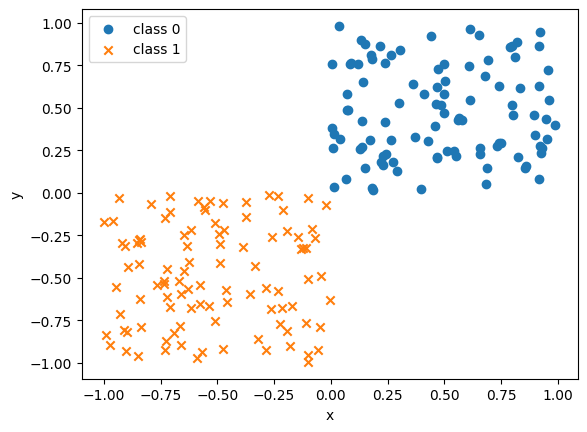

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 乱数シードを固定
rng = np.random.default_rng(123)
# x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100, 2))
# クラス0のラベルを100個生成
y0 = np.repeat(0, 100)
# x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1.0, 0.0, size=(100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1],
           marker="o", label="class 0")
ax.scatter(X1[:, 0], X1[:, 1],
           marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [11]:
# 学習，および決定境界，マージン，サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C,
                            xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1],
               marker="o", label="class 0")
    ax.scatter(X1[:, 0], X1[:, 1],
               marker="x", label="class 1")
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, 
               colors="k", levels=[-1, 0, 1], 
               alpha=0.5, linestyles=["--", "-", "--"])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],  
               svc.support_vectors_[:, 1], 
               s=250, facecolors="none",
               edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")

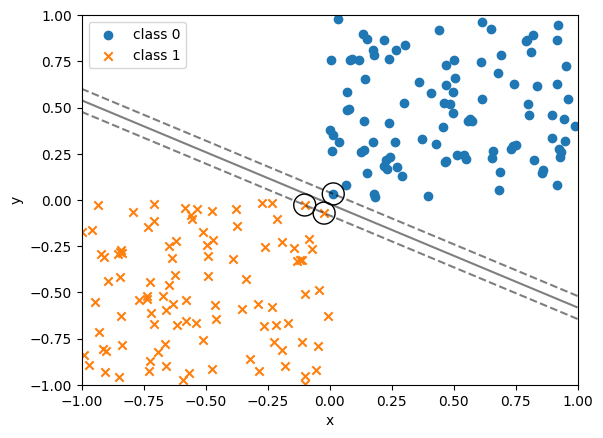

In [13]:
    # 決定境界、マージン、サポートベクタをプロット
    # 線形カーネル
    # Cを大きくするとマージンが小さくなる
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel="linear", C=1e6)

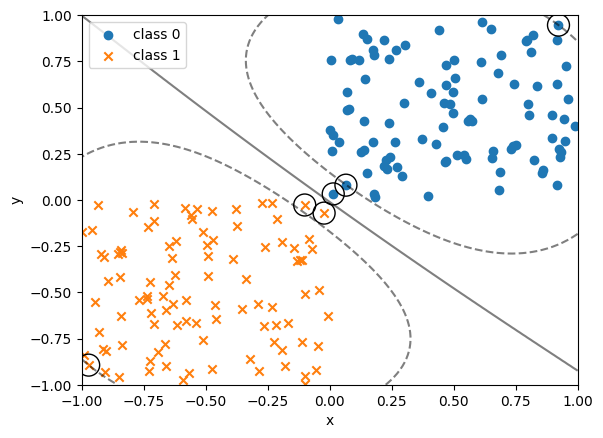

In [12]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel="rbf", C=10)

## 決定木


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 学習データセットとテストデータセットに分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化する (木の最大の深さ=3)
tree = DecisionTreeClassifier(max_depth=3,
                              random_state=123)
# 学習
tree.fit(X_train, y_train)
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## ランダムフォレスト

In [15]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化する
# 100個の決定木を用いる
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)
# 学習
forest.fit(X_train, y_train)
# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

# 回帰
- sklearn.linear_model　LinearRegression

## 線形回帰

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# カルフォルニアの地区別に住宅価格の中央値と8個の特徴量のデータセット
housing = fetch_california_housing()
X, y = housing.data, housing.target
# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)

# 線形回帰をインスタンス化
lr = LinearRegression()
# 学習
lr.fit(X_train, y_train)
# テストデータセットを予測
y_pred = lr.predict(X_test)
y_pred

array([2.38551557, 1.43819761, 2.03910383, ..., 2.07597668, 2.58562082,
       2.429208  ], shape=(6192,))

# 次元削減
- sklearn.decomposition　PCA

## 主成分分析

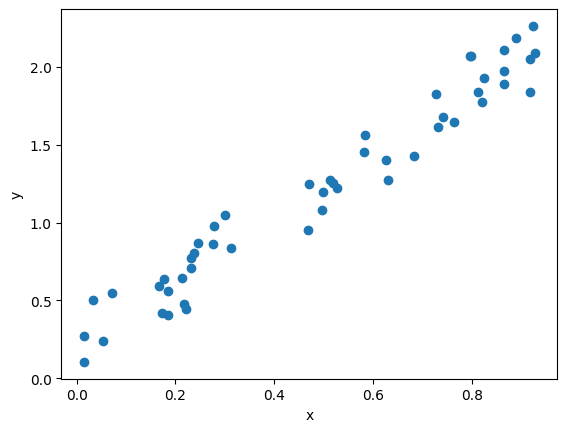

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# シード値を固定
rng = np.random.default_rng(123)
# 0以上1未満の一様乱数を50個生成
X = rng.uniform(size=50)
# Xを2倍した後に、0以上1未満の一様乱数を0.5倍して足し合わせる
Y = 2*X + 0.5*rng.uniform(size=50)
# 散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

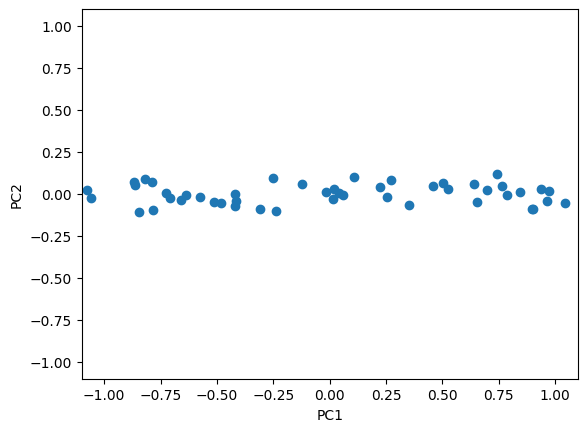

In [20]:
from sklearn.decomposition import PCA
# 主成分のクラスをインスタンス化
# 主成分の数を2とする
pca = PCA(n_components=2)
# 主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X.reshape(-1, 1),
                          Y.reshape(-1, 1))))
# 主成分分析の結果得られた座標を散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

# モデルの評価

## カテゴリの分類精度
- sklearn.metrics　classification_report

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
# 学習データセット、テストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)
# SVMのインスタンス化
svc = SVC()
# SVMで学習
svc.fit(X_train, y_train)
# テストデータセットの予測
y_pred = svc.predict(X_test)

# 適合率、再現率、F値を出力
# precision=適合率, recall=再現率, f1-score=F値, support=サポート数
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 交差検証

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# サポートベクタマシンをインスタンス化
svc = SVC()
# 10分割の交差検証を実行
# 適合率を計算
cross_val_score(svc, X, y, cv=10, scoring="precision")
# 再現率を計算
cross_val_score(svc, X, y, cv=10, scoring="recall")
# F値を計算
cross_val_score(svc, X, y, cv=10, scoring="f1")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 予測確率の正確さ


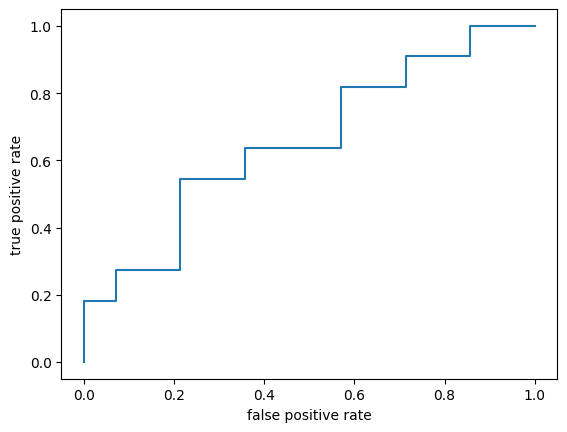

In [30]:
import numpy as np
import matplotlib.pyplot as plt
# 偽陽性率と真陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6,
                7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7,
                7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11])/11
# ROC曲線(偽陽性率(FPR)を横軸、真陽性率(TPR)を縦軸にとった曲線)をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# 各ユーザが退会したかどうかを表すラベル
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
# 各ユーザの予測退会確率
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                  0.8, 0.75, 0.71, 0.63, 0.55,
                  0.51, 0.47, 0.43, 0.38, 0.35,
                  0.31, 0.28, 0.24, 0.22, 0.19,
                  0.15, 0.12, 0.08, 0.04, 0.01])
# AUC(ROC曲線の下の面積)を算出
roc_auc_score(labels, probs)

np.float64(0.6558441558441558)